In [657]:
#Funfact - collab already has sklearn installed, just need to import it
import sklearn

In [658]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [659]:
len(X), len(y)

(1000, 1000)

In [660]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [661]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

In [662]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


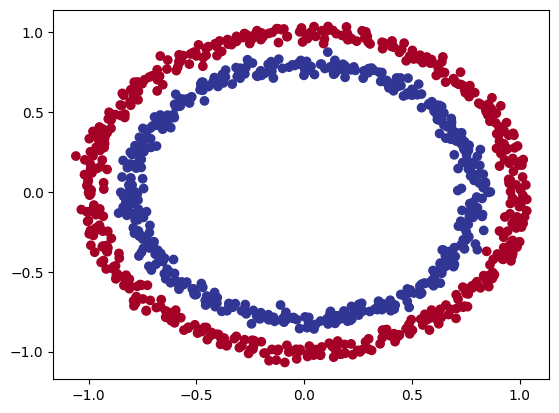

In [663]:
#Visualize our Data
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:,1], c = y, cmap= plt.cm.RdYlBu)

In [664]:
#Let us check our input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [665]:
#View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [666]:
#As always - let us turn our data into tensors and creating train and test splits
import torch
torch.__version__

'2.4.1+cu121'

In [667]:
#We want to change into pytorch tensors of torch.float32 - which is default, we do this to avoid some potential errors later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [668]:
from sklearn.model_selection import train_test_split

In [669]:
#Splitting our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [670]:
#Building our Model
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [671]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    #Create 2 nn.linear layers that can handle our data
    #self.Layer1 = nn.Linear(in_features= 2, out_features = 5) # takes in 2 features and upscales to 5 features
    #self.Layer2 = nn.Linear(in_features= 5, out_features = 1) # takes in 5 features and downscales to just 1

    self.two_linear_layers = nn.Sequential(
      nn.Linear(in_features = 2,  out_features = 5),
      nn.Linear(in_features = 5,  out_features = 1)
    )


  def forward(self, X):
    return self.two_linear_layers(X)#self.Layer2(self.Layer1(X))

model_0 = CircleModelV1().to(device)

In [672]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [673]:
#Easier way to define a NN
#Benefit though to making classes is that more complex problems require Obj Oriented Programming


model_0 = nn.Sequential(
  nn.Linear(in_features = 2,  out_features = 256),
  nn.ReLU(),
  nn.Linear(in_features = 256,  out_features = 256),
  nn.ReLU(),
  nn.Linear(in_features = 256,  out_features = 1),

).to(device)

In [674]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445],
                      [-0.4826,  0.2180],
                      [-0.2435,  0.2167],
                      [-0.1473,  0.5865],
        

In [675]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
  print(f"First 10 Predictions: {(torch.round(untrained_preds[:10]))}")
  print(f"First 10 Labels: {(y_test[:10])}")



Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])
First 10 Predictions: tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')
First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [676]:
# Now let us choose a loss funciton and optimizer

#loss_fn = nn.BCELoss() # without sigoid
loss_fn = nn.BCEWithLogitsLoss() #BCE loss with the sigmoid activation function built in
#Softmax is used for multiclassification and sigmoid is usually used for binary
optimizer = torch.optim.SGD(params = model_0.parameters(), lr =0.1)


In [677]:
def acc(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [678]:
epochs = 10;


model_0.eval()
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))).squeeze())

y_pred_labels


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [679]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [680]:
epochs = 1000

for epoch in range(epochs):


  model_0.train()

  y_logits = model_0(X_train.to(device)).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #IMPORTANT TO NOTE THAT WE NEED BCE WITH LOGITS
  loss = loss_fn(y_logits, y_train.to(device))
  accuracy = acc(y_train.to(device), y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test.to(device)).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test.to(device))
    test_acc = acc(y_true = y_test.to(device), y_pred = test_pred)


  if epoch % 10 == 0:
    print(f"Epoch {epoch} train Loss: {loss:.5f}, Train Acc: {accuracy:.2f}")
    print(f"Epoch {epoch} test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")


Epoch 0 train Loss: 0.69432, Train Acc: 50.00
Epoch 0 test Loss: 0.69430, Test Acc: 50.00
Epoch 10 train Loss: 0.68872, Train Acc: 50.00
Epoch 10 test Loss: 0.69004, Test Acc: 50.00
Epoch 20 train Loss: 0.68420, Train Acc: 54.37
Epoch 20 test Loss: 0.68641, Test Acc: 53.00
Epoch 30 train Loss: 0.67999, Train Acc: 56.62
Epoch 30 test Loss: 0.68299, Test Acc: 54.00
Epoch 40 train Loss: 0.67549, Train Acc: 60.88
Epoch 40 test Loss: 0.67928, Test Acc: 55.00
Epoch 50 train Loss: 0.67065, Train Acc: 67.50
Epoch 50 test Loss: 0.67520, Test Acc: 61.00
Epoch 60 train Loss: 0.66536, Train Acc: 72.12
Epoch 60 test Loss: 0.67069, Test Acc: 65.00
Epoch 70 train Loss: 0.65954, Train Acc: 76.62
Epoch 70 test Loss: 0.66564, Test Acc: 70.50
Epoch 80 train Loss: 0.65303, Train Acc: 80.75
Epoch 80 test Loss: 0.65994, Test Acc: 74.50
Epoch 90 train Loss: 0.64563, Train Acc: 83.38
Epoch 90 test Loss: 0.65340, Test Acc: 79.50
Epoch 100 train Loss: 0.63728, Train Acc: 85.50
Epoch 100 test Loss: 0.64603, Test

In [681]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


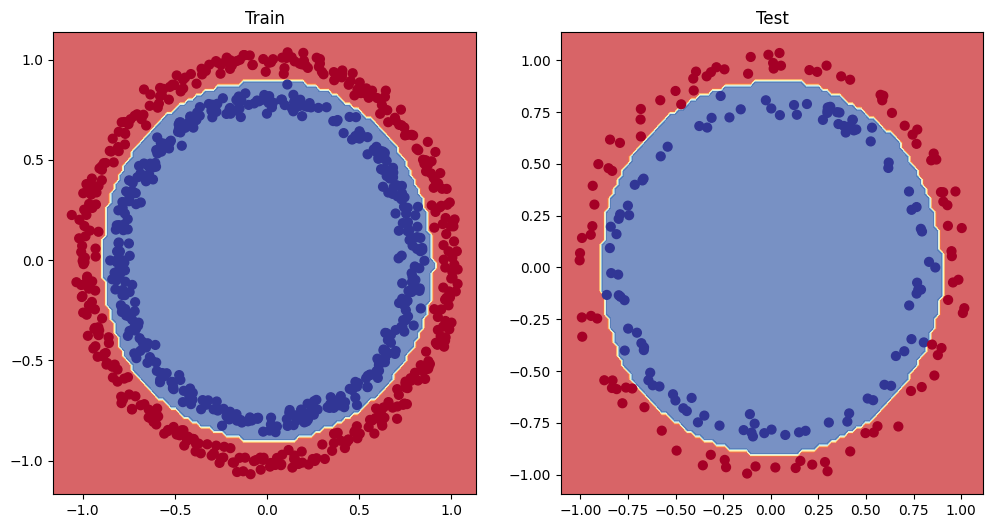

In [682]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [683]:
#So our issue is in non-linearity of this problem....how can we adjust our neural net to handle this......?
#Let us fix our model - perhaps we can add more layers, this gives our model more chances to learn patterns in our data - right now it can only make a single boundry
#We can add more hidden units
#We can fit for longer
#Or maybe even change the activation functions.....like RELU - we might be missing a RELU!
#Try changing the learning rate
#Try changing the loss function

#SOLUTION: add a ReLU to allow for non-linearity!!! Next, I added some additional hidden nodes - increased the size of the hidden layers, we have achieved 100% accuracy with this method
#Congrats - you have achieved a training of a more complex binary classifier

#Summary
#Using nn.Sequential to quickly build a model
#Using ReLU to allow our models to linear things that are not just linear! - important to add an activation function after a layer
#Some useful diagramming tips
#Binary Cross Entropy Loss - with and without Logits (does sigmoid for you - a means to keep between 0 and 1)

#There are many ways to improve a model and machine learning is all about experimentation with these methods.
#As you see more examples you will start to pick up an intuition for solving different problems

#Cool visualizer: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,2&seed=0.58959&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false